<a href="https://colab.research.google.com/github/manoj0237/Deeplearning/blob/master/Assignment_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size =128
num_classes =10
epochs=20

In [7]:
(trainimages, trainlabels), (testimages,testlabels)=cifar10.load_data()

170500096/170498071 [==============================] - 45s 0us/step


**Preprocess the data**


In [0]:
trainimages=trainimages.reshape(len(trainimages),3072)
testimages=testimages.reshape(len(testimages),3072)

**Normalising the data**

In [0]:
trainimages=trainimages.astype('float32')
testimages=testimages.astype('float32')
trainimages/=255
testimages/=255

In [11]:
print(trainimages.shape[0], 'train examples')
print(testimages.shape[0], 'test examples')
trainimages.shape

50000 train examples
10000 test examples


(50000, 3072)

**Converting labels into Multi-Class**

In [0]:
trainlabels=keras.utils.to_categorical(trainlabels, num_classes)
testlabels=keras.utils.to_categorical(testlabels,num_classes)

**Model layers**

In [0]:
model= Sequential()
model.add(Dense(512,activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])

Using two layers with activation function RELU  and output layer using SIGMOID activation function gives an accuracy of about 50%

In [16]:
history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 113us/step - loss: 2.0227 - acc: 0.2537 - val_loss: 1.9457 - val_acc: 0.2830
Epoch 2/20
50000/50000 [==============================] - 4s 74us/step - loss: 1.8604 - acc: 0.3273 - val_loss: 1.7857 - val_acc: 0.3593
Epoch 3/20
50000/50000 [==============================] - 4s 73us/step - loss: 1.7800 - acc: 0.3562 - val_loss: 1.7865 - val_acc: 0.3662
Epoch 4/20
50000/50000 [==============================] - 4s 73us/step - loss: 1.7244 - acc: 0.3770 - val_loss: 1.6533 - val_acc: 0.4050
Epoch 5/20
50000/50000 [==============================] - 4s 73us/step - loss: 1.6809 - acc: 0.3963 - val_loss: 1.6329 - val_acc: 0.4188
Epoch 6/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.6445 - acc: 0.4106 - val_loss: 1.5959 - val_acc: 0.4333
Epoch 7/20
50000/50000 [==============================] - 4s 72us/step - loss: 1.6111 - acc: 0.4257 - val_loss: 1.6401 - val_ac

In [17]:
score = model.evaluate(testimages, testlabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4060170072555542
Test accuracy: 0.5006


In [18]:
historydict=history.history
historydict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:

training_loss=historydict['loss']
validation_loss=historydict['val_loss']
train_accuracy=historydict['acc']
validation_accuracy=historydict['val_acc']


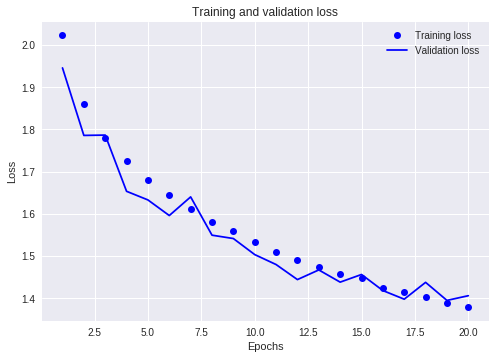

In [20]:
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

show the training and validation loss shows the loss decreases as we increase the epochs.

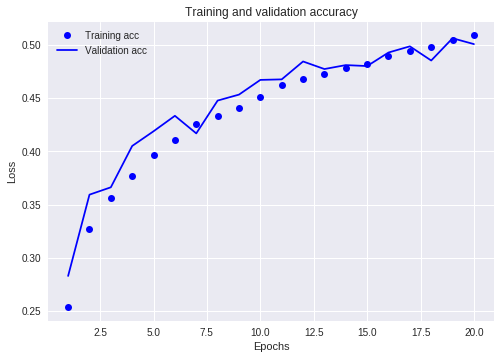

In [22]:
plt.clf()
plt.plot(epochs, train_accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

this Accuracy plot show there is no overfitting between the training and validation. 

**Tuning Hyperparameters**

In [0]:
no_of_epochs=[20,30,40,50,60,100]
Info_epochs=[]
for epochs in no_of_epochs:
  print("training with " +str(epochs)+ " epochs")
  batch_size =128
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Info_epochs.append((str(epochs), history))

  

training with 20 epochs
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 142us/step - loss: 2.2426 - acc: 0.2506 - val_loss: 1.8456 - val_acc: 0.3241
Epoch 2/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.8514 - acc: 0.3279 - val_loss: 1.7359 - val_acc: 0.3701
Epoch 3/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.7774 - acc: 0.3595 - val_loss: 1.7137 - val_acc: 0.3867
Epoch 4/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.7317 - acc: 0.3771 - val_loss: 1.7241 - val_acc: 0.3946
Epoch 5/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.6956 - acc: 0.3902 - val_loss: 1.6633 - val_acc: 0.4033
Epoch 6/20
50000/50000 [==============================] - 4s 78us/step - loss: 1.6683 - acc: 0.4034 - val_loss: 1.6201 - val_acc: 0.4168
Epoch 7/20
50000/50000 [==============================] - 4s 77us/step - loss: 1.6489 - acc: 0.4072 - v

Out of all the epochs experiment using 40 epochs seems to be very good idea as the accuracy seems better with 40 lets run all the epochs in a single plot 

Text(0.5, 1.0, 'Loss Curves')

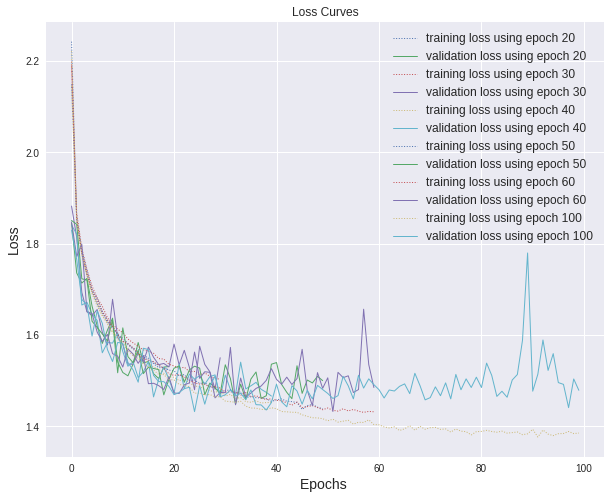

In [0]:
#reference-https://github.com/aleju/LossAccPlotter

plt.figure(figsize=[10,8])
legend=[]
for epoch_number,history in Info_epochs:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using epoch '+epoch_number)
  legend.append('validation loss using epoch '+epoch_number)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss Curves',fontsize=12)

Text(0.5, 1.0, 'Accuracy curve')

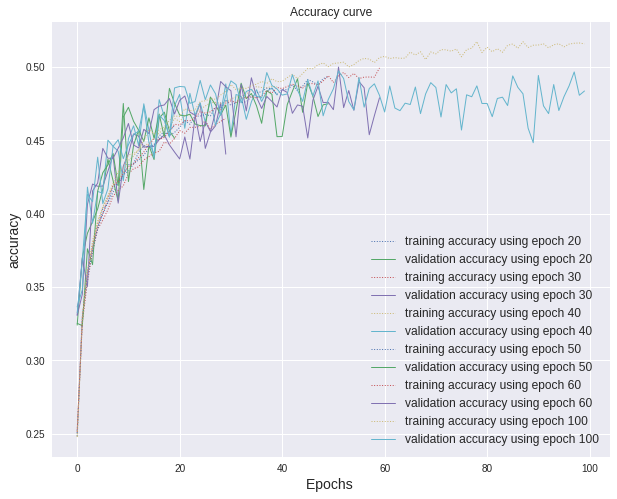

In [0]:
#reference-https://github.com/aleju/LossAccPlotter

plt.figure(figsize=[10,8])
legend=[]
for epoch_number,history in Info_epochs:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy using epoch '+epoch_number)
  legend.append('validation accuracy using epoch '+epoch_number)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

lets plots the accuracy and loss function using epoch 40

In [25]:
history_epoch = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=1,
                    validation_data=(testimages, testlabels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 73us/step - loss: 1.0833 - acc: 0.6142 - val_loss: 1.2665 - val_acc: 0.5543
Epoch 2/40
50000/50000 [==============================] - 4s 72us/step - loss: 1.0740 - acc: 0.6161 - val_loss: 1.2565 - val_acc: 0.5568
Epoch 3/40
50000/50000 [==============================] - 4s 72us/step - loss: 1.0717 - acc: 0.6148 - val_loss: 1.2647 - val_acc: 0.5593
Epoch 4/40
50000/50000 [==============================] - 4s 72us/step - loss: 1.0698 - acc: 0.6164 - val_loss: 1.2742 - val_acc: 0.5530
Epoch 5/40
50000/50000 [==============================] - 4s 72us/step - loss: 1.0576 - acc: 0.6220 - val_loss: 1.2669 - val_acc: 0.5541
Epoch 6/40
50000/50000 [==============================] - 4s 73us/step - loss: 1.0585 - acc: 0.6198 - val_loss: 1.2905 - val_acc: 0.5485
Epoch 7/40
50000/50000 [==============================] - 4s 72us/step - loss: 1.0521 - acc: 0.6235 - val_loss: 1.2784 - val_acc

In [0]:
historydict=history_epoch.history
historydict.keys()
epochtrainingacc = historydict['acc']
epochtrainingloss = historydict['loss']
epochvalidationacc = historydict['val_acc']
epochvalidationloss = historydict['val_loss']

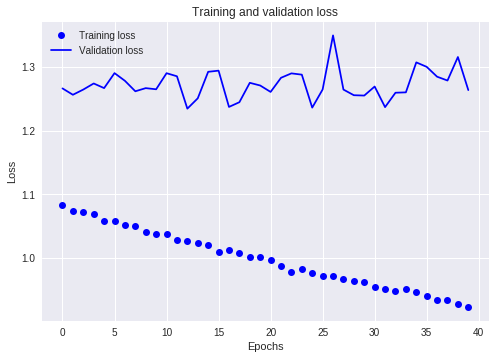

In [29]:

plt.plot(epochtrainingloss, 'bo', label='Training loss')
plt.plot(epochvalidationloss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

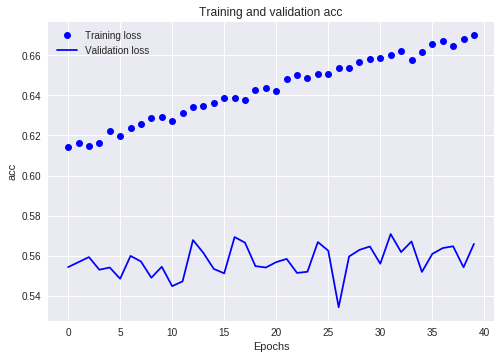

In [32]:

plt.plot(epochtrainingacc, 'bo', label='Training acc')
plt.plot(epochvalidationacc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

training with 40 apochs and validation results in overfitting.

**size of Batch**

In [0]:
size_of_batch=[64,128,256,512,1024,2048]
Info_batch_size=[]
for batch_size in size_of_batch:
  print("training with " +str(batch_size)+ " batch")
  epochs=40
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Info_batch_size.append((str(batch_size), history))

training with 64 batch
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 7s 136us/step - loss: 2.0740 - acc: 0.2662 - val_loss: 1.8169 - val_acc: 0.3309
Epoch 2/40
50000/50000 [==============================] - 7s 133us/step - loss: 1.8415 - acc: 0.3327 - val_loss: 1.7876 - val_acc: 0.3571
Epoch 3/40
50000/50000 [==============================] - 7s 133us/step - loss: 1.7871 - acc: 0.3545 - val_loss: 1.9171 - val_acc: 0.3032
Epoch 4/40
50000/50000 [==============================] - 7s 132us/step - loss: 1.7521 - acc: 0.3714 - val_loss: 1.7139 - val_acc: 0.3729
Epoch 5/40
50000/50000 [==============================] - 7s 133us/step - loss: 1.7276 - acc: 0.3771 - val_loss: 1.8043 - val_acc: 0.3459
Epoch 6/40
50000/50000 [==============================] - 7s 133us/step - loss: 1.7099 - acc: 0.3843 - val_loss: 1.6468 - val_acc: 0.4214
Epoch 7/40
50000/50000 [==============================] - 7s 133us/step - loss: 1.7033 - acc: 0.388

Here the batch size 512 seems to be very efficient in accuracy with 51% and loss 1.37


Text(0.5, 1.0, 'Accuracy curve')

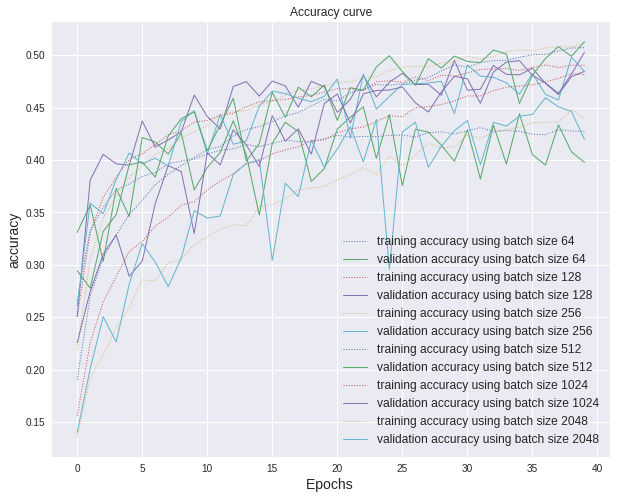

In [0]:
plt.figure(figsize=[10,8])
legend=[]
for batches,history in Info_batch_size:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy using batch size '+batches)
  legend.append('validation accuracy using batch size '+batches)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

Text(0.5, 1.0, 'Loss Curves')

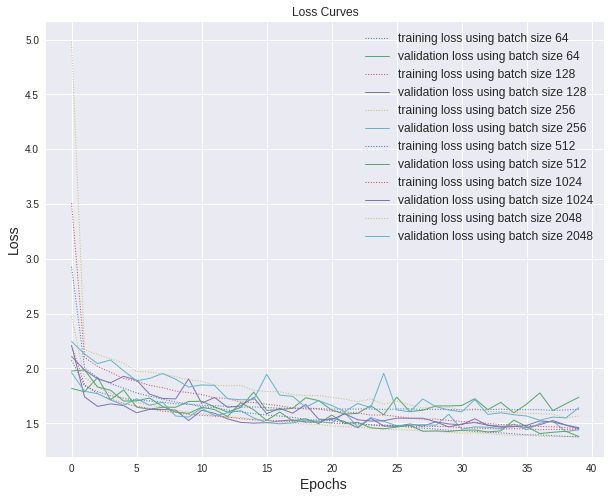

In [40]:
plt.figure(figsize=[10,8])
legend=[]
for batches,history in Info_batch_size:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using batch size '+batches)
  legend.append('validation loss using batch size '+batches)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss Curves',fontsize=12)

Here the plots for all the batches with accuracy and losses plotted for each batch size and from the results we took batch 512 as important one

**number of neurons in each layer**

In [42]:
no_of_neurons=[(256,512),(512,512),(512,256),(512,1024),(1024,1024),(1024,512)]
change_in_neurons=[]
for neuron_layer_1, neuron_layer_2 in no_of_neurons:
  print("training with " +str(neuron_layer_1)+ ',' +str(neuron_layer_2)+ " neurons in the network")
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(neuron_layer_1,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(neuron_layer_2,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  change_in_neurons.append(((str(neuron_layer_1)),str(neuron_layer_2), history))

training with 256,512 neurons in the network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 33us/step - loss: 2.3272 - acc: 0.1889 - val_loss: 2.0589 - val_acc: 0.2497
Epoch 2/40
50000/50000 [==============================] - 1s 23us/step - loss: 1.9953 - acc: 0.2643 - val_loss: 1.8936 - val_acc: 0.2868
Epoch 3/40
50000/50000 [==============================] - 1s 22us/step - loss: 1.9245 - acc: 0.3026 - val_loss: 1.8540 - val_acc: 0.3318
Epoch 4/40
50000/50000 [==============================] - 1s 22us/step - loss: 1.8715 - acc: 0.3211 - val_loss: 1.7545 - val_acc: 0.3648
Epoch 5/40
50000/50000 [==============================] - 1s 22us/step - loss: 1.8373 - acc: 0.3395 - val_loss: 1.7821 - val_acc: 0.3617
Epoch 6/40
50000/50000 [==============================] - 1s 22us/step - loss: 1.7981 - acc: 0.3553 - val_loss: 1.7803 - val_acc: 0.3545
Epoch 7/40
50000/50000 [==============================] - 1s 22us/step - loss: 1.77

From the results it seems the 512 and 256 neurons in both layers seems to give some good results. we continue with that.


Text(0.5, 1.0, 'Accuracy curve')

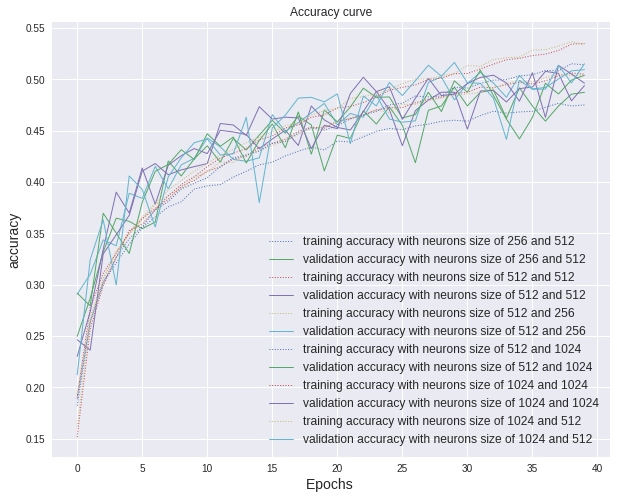

In [43]:
plt.figure(figsize=[10,8])
legend=[]
for L1_neurons,L2_neurons,history in change_in_neurons:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy with neurons size of '+L1_neurons+ ' and '+L2_neurons )
  legend.append('validation accuracy with neurons size of '+L1_neurons+ ' and '+L2_neurons)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

Text(0.5, 1.0, 'Loss curve')

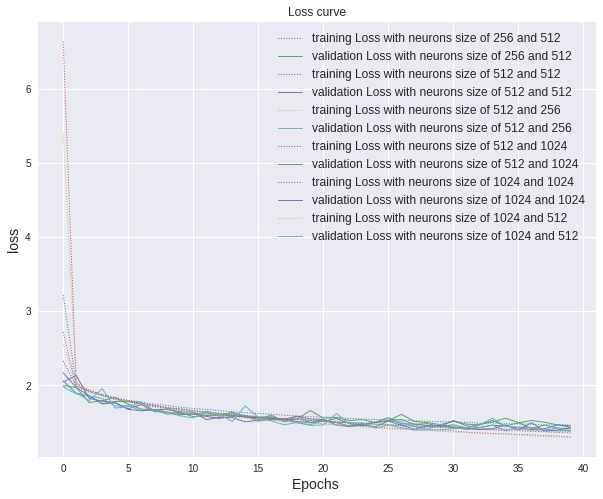

In [44]:
plt.figure(figsize=[10,8])
legend=[]
for L1_neurons,L2_neurons,history in change_in_neurons:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training Loss with neurons size of '+L1_neurons+ ' and '+L2_neurons )
  legend.append('validation Loss with neurons size of '+L1_neurons+ ' and '+L2_neurons)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('Loss curve',fontsize=12)

the plots shows the results of with number of neurons in each layer


**changing the No to layers in the network**

For this testing I changed the layers in the network accordingly and print the validation accuracy and validation loss at the end of the all iterations.

**USING SINGLE HIDDEN LAYER**

In [46]:
  epochs=40
  batch_size=512
  Layer_weights=[]
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Layer_weights.append(("single hidden layer",history))
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 46us/step - loss: 2.9728 - acc: 0.1749 - val_loss: 2.1030 - val_acc: 0.2411
Epoch 2/40
50000/50000 [==============================] - 1s 29us/step - loss: 2.0108 - acc: 0.2651 - val_loss: 1.9334 - val_acc: 0.2945
Epoch 3/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.9230 - acc: 0.3024 - val_loss: 1.9609 - val_acc: 0.2847
Epoch 4/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.8749 - acc: 0.3248 - val_loss: 1.7914 - val_acc: 0.3650
Epoch 5/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.8261 - acc: 0.3445 - val_loss: 1.7195 - val_acc: 0.3881
Epoch 6/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7877 - acc: 0.3568 - val_loss: 1.7387 - val_acc: 0.3774
Epoch 7/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7592 - acc: 0.3694 - val_loss: 1.6690 - val_acc

**USING TWO HIDDEN LAYERS**

In [47]:
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Layer_weights.append(("two hidden layer",history))


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 53us/step - loss: 2.5580 - acc: 0.1856 - val_loss: 2.1045 - val_acc: 0.2254
Epoch 2/40
50000/50000 [==============================] - 2s 31us/step - loss: 2.0085 - acc: 0.2651 - val_loss: 1.9705 - val_acc: 0.2780
Epoch 3/40
50000/50000 [==============================] - 2s 31us/step - loss: 1.9378 - acc: 0.2971 - val_loss: 1.8421 - val_acc: 0.3477
Epoch 4/40
50000/50000 [==============================] - 2s 31us/step - loss: 1.8776 - acc: 0.3237 - val_loss: 1.8872 - val_acc: 0.3285
Epoch 5/40
50000/50000 [==============================] - 2s 31us/step - loss: 1.8317 - acc: 0.3443 - val_loss: 1.7095 - val_acc: 0.3966
Epoch 6/40
50000/50000 [==============================] - 2s 31us/step - loss: 1.7919 - acc: 0.3564 - val_loss: 1.7193 - val_acc: 0.3837
Epoch 7/40
50000/50000 [==============================] - 2s 31us/step - loss: 1.7610 - acc: 0.3664 - val_loss: 1.7236 - val_acc

**USING THREE HIDDEN LAYERS**

In [48]:
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Layer_weights.append(("Three hidden layer",history))


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 58us/step - loss: 2.3396 - acc: 0.1637 - val_loss: 2.0312 - val_acc: 0.2569
Epoch 2/40
50000/50000 [==============================] - 2s 33us/step - loss: 2.0537 - acc: 0.2474 - val_loss: 1.9024 - val_acc: 0.3056
Epoch 3/40
50000/50000 [==============================] - 2s 32us/step - loss: 1.9694 - acc: 0.2871 - val_loss: 1.9017 - val_acc: 0.2987
Epoch 4/40
50000/50000 [==============================] - 2s 33us/step - loss: 1.9069 - acc: 0.3110 - val_loss: 1.8918 - val_acc: 0.3421
Epoch 5/40
50000/50000 [==============================] - 2s 33us/step - loss: 1.8631 - acc: 0.3286 - val_loss: 1.9506 - val_acc: 0.3017
Epoch 6/40
50000/50000 [==============================] - 2s 32us/step - loss: 1.8217 - acc: 0.3468 - val_loss: 1.9663 - val_acc: 0.2948
Epoch 7/40
50000/50000 [==============================] - 2s 32us/step - loss: 1.7982 - acc: 0.3553 - val_loss: 1.7943 - val_acc

Text(0.5, 1.0, 'Loss Curves')

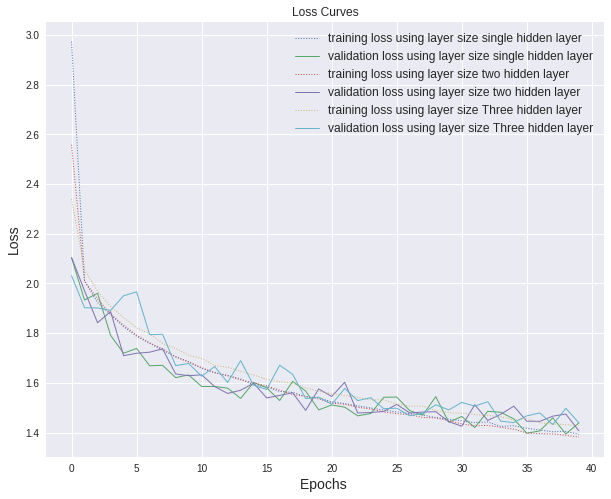

In [49]:
plt.figure(figsize=[10,8])
legend=[]
for hidden,history in Layer_weights:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using layer size '+hidden)
  legend.append('validation loss using layer size '+hidden)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss Curves',fontsize=12)

Text(0.5, 1.0, 'Accuracy curve')

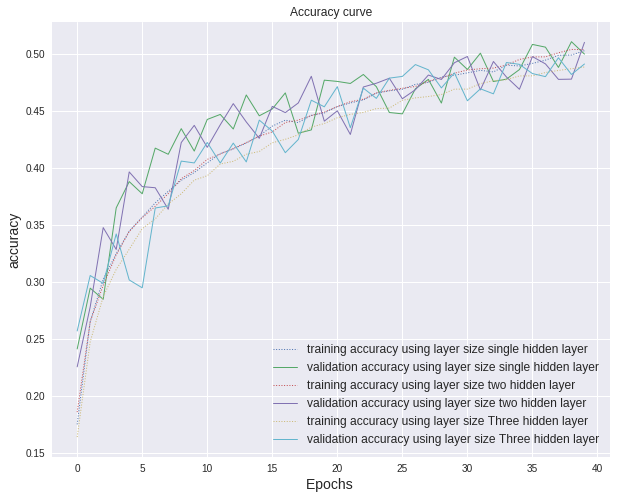

In [51]:
plt.figure(figsize=[10,8])
legend=[]
for hidden,history in Layer_weights:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy using layer size '+hidden)
  legend.append('validation accuracy using layer size '+hidden)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

**here the using two hidden layers gives ideal results but problems in overfitting so single hidden layer also gives the ideal results.**

In [52]:
learning_rate=[0.0001,0.001,0.005,0.01,0.05,0.1]
rate_of_learn=[]
for LR in learning_rate:
  print("training with Learning Rate " +str(LR)+ " in the network")
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(lr=LR),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  rate_of_learn.append((str(LR), history))

training with Learning Rate 0.0001 in the network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 50us/step - loss: 2.0333 - acc: 0.2672 - val_loss: 1.8819 - val_acc: 0.3270
Epoch 2/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.8657 - acc: 0.3329 - val_loss: 1.7950 - val_acc: 0.3608
Epoch 3/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7894 - acc: 0.3687 - val_loss: 1.7210 - val_acc: 0.3830
Epoch 4/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7382 - acc: 0.3840 - val_loss: 1.6965 - val_acc: 0.4026
Epoch 5/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7040 - acc: 0.3937 - val_loss: 1.6465 - val_acc: 0.4209
Epoch 6/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.6696 - acc: 0.4114 - val_loss: 1.6261 - val_acc: 0.4191
Epoch 7/40
50000/50000 [==============================] - 1s 29us/step - loss:

**the results suggest learning rate 0.001 seems to be good. as we can take less learning rates than that which gives same results  but the higher in the learning rate helps to get the results in less number of epochs. the algorithm learns a lot in less number of time**

Text(0.5, 1.0, 'Accuracy curve')

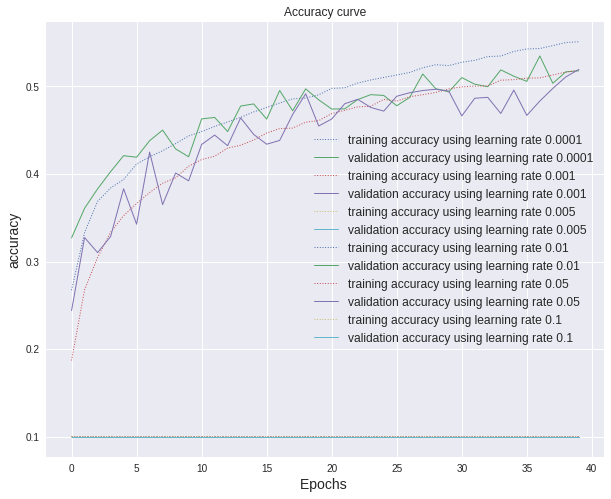

In [53]:
plt.figure(figsize=[10,8])
legend=[]
for learn,history in rate_of_learn:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy using learning rate '+learn)
  legend.append('validation accuracy using learning rate '+learn)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

Text(0.5, 1.0, 'loss curve')

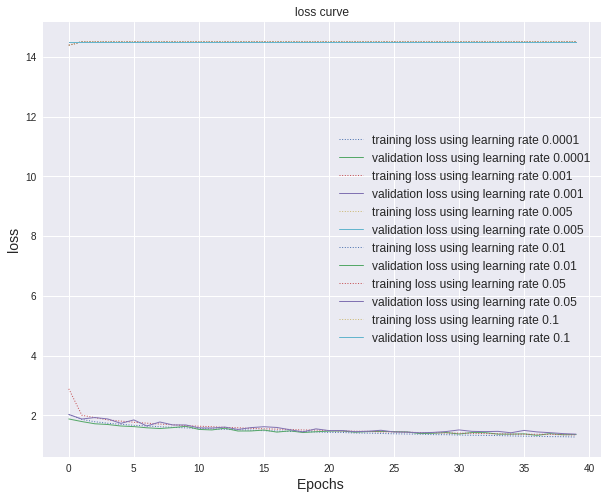

In [54]:
plt.figure(figsize=[10,8])
legend=[]
for learn,history in rate_of_learn:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using learning rate '+learn)
  legend.append('validation loss using learning rate '+learn)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('loss curve',fontsize=12)

Here I want to perform all the activation functions on the hidden layers since softmax is the best in classifing the multi-class classification. we use the output layer as softmax and change remaining layer sigmoid function.

In [55]:
activation_functions=['sigmoid','selu','softplus','softsign','relu','tanh','hard_sigmoid','exponential']
Afunction=[]
for AF in activation_functions:
  print("training with Activation function " +str(AF)+ " in the network")
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(512,activation=AF, input_shape=(3072,)))
  model.add(Dropout(0.2))
  model.add(Dense(512,activation=AF))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  Afunction.append((str(AF),history))

training with Activation function sigmoid in the network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 57us/step - loss: 2.1986 - acc: 0.2013 - val_loss: 2.1059 - val_acc: 0.2623
Epoch 2/40
50000/50000 [==============================] - 1s 28us/step - loss: 1.9790 - acc: 0.2863 - val_loss: 1.8180 - val_acc: 0.3504
Epoch 3/40
50000/50000 [==============================] - 1s 28us/step - loss: 1.8813 - acc: 0.3251 - val_loss: 1.8646 - val_acc: 0.3191
Epoch 4/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.8280 - acc: 0.3470 - val_loss: 1.7608 - val_acc: 0.3859
Epoch 5/40
50000/50000 [==============================] - 1s 29us/step - loss: 1.7777 - acc: 0.3649 - val_loss: 1.7901 - val_acc: 0.3600
Epoch 6/40
50000/50000 [==============================] - 1s 28us/step - loss: 1.7400 - acc: 0.3799 - val_loss: 1.8036 - val_acc: 0.3654
Epoch 7/40
50000/50000 [==============================] - 1s 29us/step 

After comparing the entire ressults the results of RELU seems good when compared to other activating function.

Text(0.5, 1.0, 'Accuracy curve')

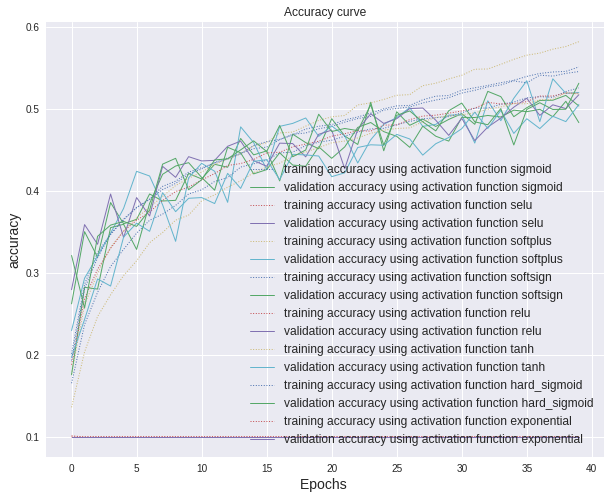

In [57]:
plt.figure(figsize=[10,8])
legend=[]
for acti_fun,history in Afunction:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training accuracy using activation function '+acti_fun)
  legend.append('validation accuracy using activation function '+acti_fun)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('Accuracy curve',fontsize=12)

Text(0.5, 1.0, 'loss curve')

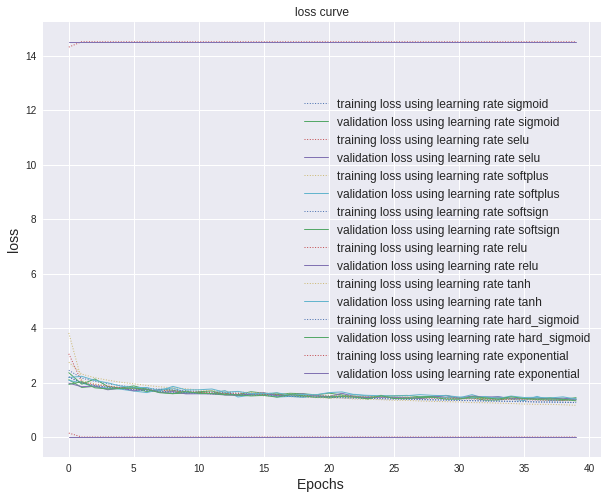

In [58]:
plt.figure(figsize=[10,8])
legend=[]
for acti_fun,history in Afunction:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using learning rate '+acti_fun)
  legend.append('validation loss using learning rate '+acti_fun)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('loss curve',fontsize=12)

In [69]:
drop_out=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
dropout=[]
for dp in drop_out:
  print("training with dropout " +str(dp)+ " in the network")
  epochs=40
  batch_size=512
  model= Sequential()
  model.add(Dense(512,activation='relu', input_shape=(3072,)))
  model.add(Dropout(dp))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(dp))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss="categorical_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])
  history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(testimages, testlabels))
  score = model.evaluate(testimages, testlabels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  dropout.append((str(dp),history))

training with dropout 0 in the network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 5s 98us/step - loss: 3.2431 - acc: 0.1800 - val_loss: 2.0055 - val_acc: 0.2716
Epoch 2/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.9930 - acc: 0.2761 - val_loss: 1.9204 - val_acc: 0.3087
Epoch 3/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.8828 - acc: 0.3226 - val_loss: 1.9098 - val_acc: 0.3102
Epoch 4/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.8103 - acc: 0.3481 - val_loss: 1.8002 - val_acc: 0.3635
Epoch 5/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.7565 - acc: 0.3681 - val_loss: 1.6674 - val_acc: 0.4140
Epoch 6/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.7046 - acc: 0.3872 - val_loss: 1.7647 - val_acc: 0.3586
Epoch 7/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.6748 - a

Dropout rate 0.1 is efficient as we can see from the results but we can compare the dropout with our best model combined to see whether we can switch to other drop outs.

training with dropout 0 in the network
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 81us/step - loss: 3.5899 - acc: 0.1806 - val_loss: 2.0424 - val_acc: 0.2543
Epoch 2/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.9866 - acc: 0.2823 - val_loss: 2.0576 - val_acc: 0.2733
Epoch 3/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.8761 - acc: 0.3258 - val_loss: 1.7948 - val_acc: 0.3521
Epoch 4/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.8059 - acc: 0.3526 - val_loss: 1.7753 - val_acc: 0.3657
Epoch 5/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.7541 - acc: 0.3728 - val_loss: 1.8202 - val_acc: 0.3396
Epoch 6/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.6997 - acc: 0.3939 - val_loss: 1.7596 - val_acc: 0.3751
Epoch 7/40
50000/50000 [==============================] - 1s 27us/step - loss: 1.6662 - a

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
legend=[]
for drop_num,history in dropout:
  plt.plot(history.history['loss'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_loss'],linewidth=1.0)
  legend.append('training loss using dropout rate '+drop_num)
  legend.append('validation loss using dropout rate '+drop_num)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('loss',fontsize=14)
plt.title('loss curve',fontsize=12)

NameError: ignored

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'accuracy curve')

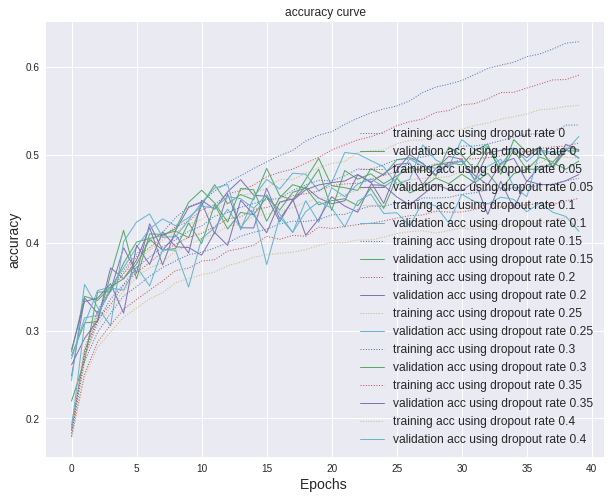

In [71]:
plt.figure(figsize=[10,8])
legend=[]
for drop_num,history in dropout:
  plt.plot(history.history['acc'],linestyle='dotted',linewidth=1.0)
  plt.plot(history.history['val_acc'],linewidth=1.0)
  legend.append('training acc using dropout rate '+drop_num)
  legend.append('validation acc using dropout rate '+drop_num)
  
plt.legend(legend,fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('accuracy',fontsize=14)
plt.title('accuracy curve',fontsize=12)

# Best Model from the results

In [0]:
#Number of Epochs =40.
#Batch size as an input =512
#Neuron size in each layer =512 in 1st layer and 256 in 2nd layer.
#we use Single hidden layer.
#Learning rate =0.001
#Activation function = Relu and softmax in output layer.
#Drop out =0.1 but ideal to check dropout till 0.2


In [0]:
model= Sequential()
model.add(Dense(512,activation='relu', input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes,activation='softmax'))

In [0]:
model.compile(loss="categorical_crossentropy",optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [37]:
history = model.fit(trainimages, trainlabels,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=1,
                    validation_data=(testimages, testlabels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 4s 76us/step - loss: 2.0177 - acc: 0.2587 - val_loss: 1.8894 - val_acc: 0.3170
Epoch 2/40
50000/50000 [==============================] - 3s 69us/step - loss: 1.8579 - acc: 0.3315 - val_loss: 1.7878 - val_acc: 0.3614
Epoch 3/40
50000/50000 [==============================] - 3s 68us/step - loss: 1.7724 - acc: 0.3614 - val_loss: 1.7175 - val_acc: 0.3859
Epoch 4/40
50000/50000 [==============================] - 3s 69us/step - loss: 1.7154 - acc: 0.3816 - val_loss: 1.6687 - val_acc: 0.3966
Epoch 5/40
50000/50000 [==============================] - 3s 69us/step - loss: 1.6729 - acc: 0.3991 - val_loss: 1.6714 - val_acc: 0.4037
Epoch 6/40
50000/50000 [==============================] - 3s 69us/step - loss: 1.6336 - acc: 0.4144 - val_loss: 1.6325 - val_acc: 0.4168
Epoch 7/40
50000/50000 [==============================] - 3s 69us/step - loss: 1.5978 - acc: 0.4270 - val_loss: 1.5682 - val_acc

**This is the accuracy with 54% which is good so far in our entire experiments so I consider this as a best model finally **

In [43]:
score = model.evaluate(testimages, testlabels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2959563707351685
Test accuracy: 0.5404


In [39]:
historydict=history.history
historydict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
training_loss=historydict['loss']
validation_loss=historydict['val_loss']
train_accuracy=historydict['acc']
validation_accuracy=historydict['val_acc']

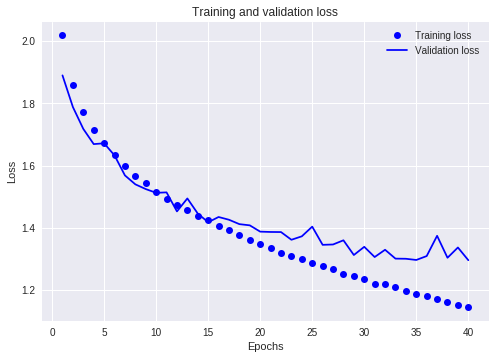

In [41]:
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**The loss of training and validation decrease to less than 1.3 after 40th epoch seems to be very good result.**

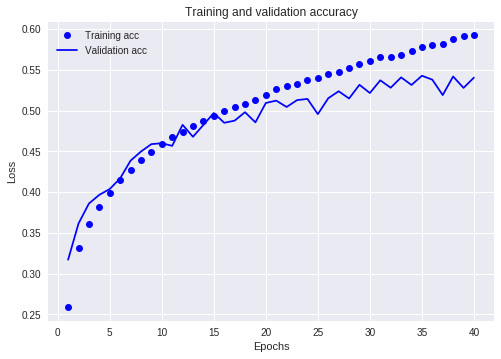

In [42]:
plt.clf()
plt.plot(epochs, train_accuracy, 'bo', label='Training acc')
plt.plot(epochs, validation_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Though the accuracy of train went higher than 59% after 40th epoch the validation accuracy seems promising with 54%. so finally considered this as a best model.**